<h2> Step 1 : Get Data </h2>

Data : https://www.kaggle.com/ngbolin/mnist-dataset-digit-recognizer/data

<h2> Step 2 : Load Data </h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("../../Data/mnist_train.csv")
test = pd.read_csv("../../Data/mnist_test.csv")
train.shape

(59999, 785)

In [3]:
train.head(2)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4> Create header </h4>

In [4]:
# Create header list
column_name = []
for i in range(785):
    string = "pixel" + str(i)
    column_name.append(string)

In [5]:
# Reload data with header
train = pd.read_csv("../../Data/mnist_train.csv", names=column_name)
train.shape

(60000, 785)

In [6]:
train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4> Convert pixels to image </h4>

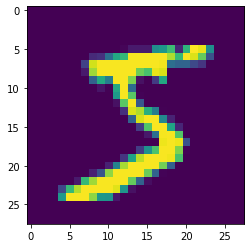

In [7]:
image = train.iloc[0,1:].values ## take numpy value of row 0(as label)and 1 to end (as features i.e. pixels)
image = image.reshape(28,28).astype('uint8') # reshape all pixel values
plt.imshow(image)

<h2> Step 2 : Prepare Data </h2>

<h3> Extracting features and label </h3>

In [8]:
label = train.iloc[:,0]
features = train.iloc[:,1:]
features.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label.head(2)

0    5
1    0
Name: pixel0, dtype: int64

In [10]:
label.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

<h2>Spot-checking  ML algorithms</h2>

spot-checking is intended to evaluate a diverse set of algorithms rapidly and provide a rough first-cut result. This first cut result may be used to get an idea if a problem or problem representation is indeed predictable, and if so, the types of algorithms that may be worth investigating further for the problem

In [19]:
%run ./02_spot_check_helper.ipynb

Defined 13 classifiers
accuracy
>log_clf: 0.915
>logcv_clf: 0.915
>ridge_clf-0.1: 0.849
>ridge_clf-1.0: 0.850
>ridgeCV_clf: 0.850
>lsvc_clf: 0.911
>knn_clf-1: 0.970
>dt_clf: 0.870
>et_clf: 0.811
>gnb_clf: 0.561
>mlp_clf: 0.949
>rf_ensemble_clf: 0.967
>et_ensemble_clf: 0.970
balanced_accuracy
>log_clf: 0.913
>logcv_clf: 0.914
>ridge_clf-0.1: 0.847
>ridge_clf-1.0: 0.847
>ridgeCV_clf: 0.848
>lsvc_clf: 0.910
>knn_clf-1: 0.970
>dt_clf: 0.868
>et_clf: 0.813
>gnb_clf: 0.553
>mlp_clf: 0.948
>rf_ensemble_clf: 0.967
>et_ensemble_clf: 0.970
f1
>log_clf: 0.913
>logcv_clf: 0.914
>ridge_clf-0.1: 0.847
>ridge_clf-1.0: 0.847
>ridgeCV_clf: 0.848
>lsvc_clf: 0.910
>knn_clf-1: 0.970
>dt_clf: 0.868
>et_clf: 0.811
>gnb_clf: 0.516
>mlp_clf: 0.949
>rf_ensemble_clf: 0.967
>et_ensemble_clf: 0.970
neg_log_loss
>log_clf: -0.361
>logcv_clf: -0.361
>ridge_clf-0.1: error
>ridge_clf-1.0: error
>ridgeCV_clf: error
>lsvc_clf: error
>knn_clf-1: -1.019
>dt_clf: -4.465
>et_clf: -6.465
>gnb_clf: -14.783
>mlp_clf: -0.203
>r

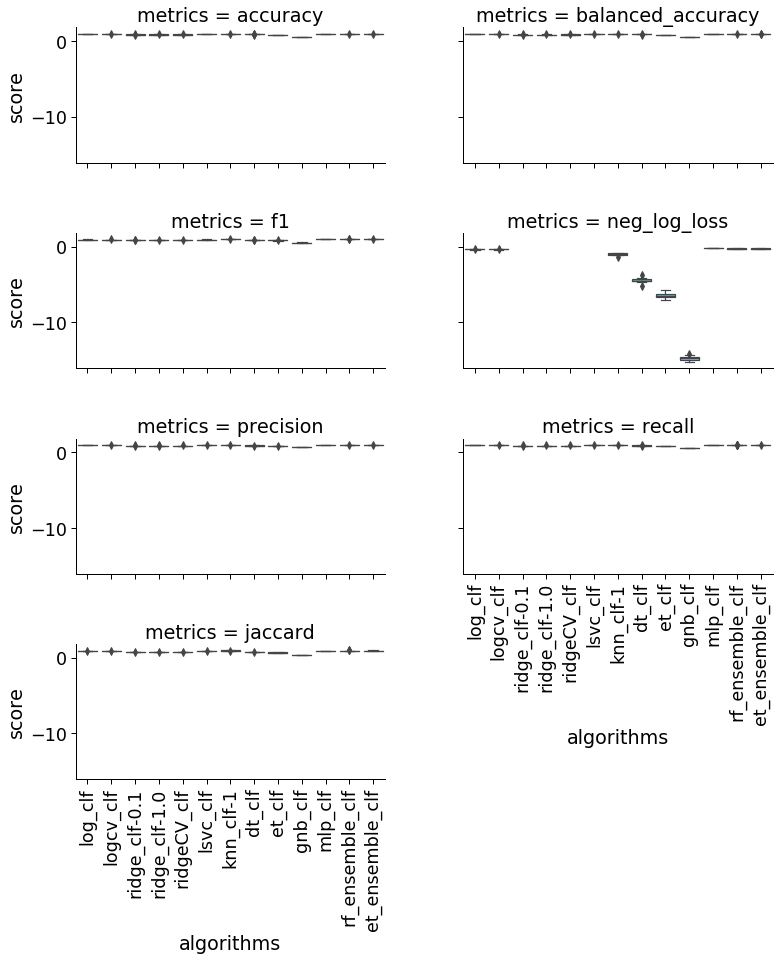

In [20]:
# get list of different classifiers
classifiers= define_classifiers()
# get list of different metrics
metrics= scoring_parameter_multiclass()
# evaluate each classifiers by passing feature data and lable data
results = evaluate_models(features,label, classifiers, metrics)
# summarize results
summarize_results(results)